<div style="background-color:#ffcc00;"><span style="color:navy;">Importing Libraries</span></div>

In [50]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
import io
import scipy.misc
import imageio
from nltk.stem.porter import PorterStemmer
from scipy.spatial import distance

books = pd.read_csv("filtered_books.csv")

In [52]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
import io
import scipy.misc
import imageio
from nltk.stem.porter import PorterStemmer
from scipy.spatial import distance

books = pd.read_csv("filtered_books.csv")
input_string = "harry potterr"
def title_contains_word(word):
    """
    input: desired word
    output: books containing that word in their title
    """
    assert isinstance(word, str)
    rows = []
    for i in range(books.shape[0]):
        if word in books['book_title'].iloc[i]:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
#title_contains_word("the great brain")

#1. returning the authors of the book 
def book_authors(input_string):
    """
    input: title
    output: book authors
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #assert isinstance(title, str)
        authors = ""
        for i in range(books.shape[0]):
            if title in books['book_title'].iloc[i]:
                authors = books['book_authors'].iloc[i]
        #print(len(filtered), " books with a rating above ", rate_above)
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future
    return [_.capitalize() for _ in authors.split("|")]
#book_authors("more adventures of the ")

#2. returning the image of the book (by index)
def plot_image(input_string):
    """
    input: row of the books dataset
    output: plotting corresponding image
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        url = books[books['book_title']==title]['image_url'].iloc[0]
        image = imageio.imread(url)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
#plot_image("more adventures of the ")

#3. returning genres of a book (by index)
def book_genres(input_string):
    """
    input: index of the dataframe
    output: genres of the corresponding book
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        genres = books[books['book_title']==title]['genres'].iloc[0].split("|")
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
    return genres
book_genres(input_string)

#4. returning description of a book
def book_desc(input_string, dataset=books):
    """
    input: index of the dataframe
    output: description
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        desc = books[books['book_title']==title]['book_desc'].iloc[0]
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
    return desc
#book_desc(input_string)

#5. returning number of pages of the book
def book_pages(input_string):
    """
    input: index of the dataframe
    output: pages
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        pages = books[books['book_title']==title]['book_pages'].iloc[0]
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
    return int(pages)

#6. returning rating of a book
def book_rating(input_string):
    """
    input: index of the dataframe
    output: rating
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        rating = books[books['book_title']==title]['book_rating'].iloc[0]
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
    return np.round(rating, 5)


def author_book(author):
    """
    input: title
    output: book authors
    """
    assert isinstance(author, str)
    authors_books = []
    for i in range(books.shape[0]):
        if author in books['book_authors'].iloc[i]:
            authors_books.append(books["book_title"].iloc[i])
    #print(len(filtered), " books with a rating above ", rate_above)
    return authors_books
author = books.iloc[500]['book_authors']
#print("author : ", author)
author_book(books.iloc[500]['book_authors'])

#7. returning other books by this author
def other_books_by_author(input_string):
    """
    input: title
    output: book authors
    """
    if title_contains_word(input_string).shape[0]==1:
        title = title_contains_word(input_string).iloc[0]['book_title']
        #print(title)
        book_list = []
        authors = books[books['book_title']==title]['book_authors'].iloc[0].split("|")
        for aut in authors:
            book_l = author_book(aut)
            for b in book_l:
                book_list.append(b)
    else:
        return "Here the user can choose between the books which are shown or we can force them to be more specific" #future  
    return book_list

In [53]:
a = title_contains_word("the hunger games") #lower case

In [378]:
def title_contain_word(word):
    """
    input: desired word
    output: books containing that word in their title
    """
    assert isinstance(word, str)
    rows = []
    for i in range(books.shape[0]):
        if word in books['book_title'].iloc[i]:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
title_contain_word("the academy")
#def desc()

,Unnamed: 0,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
24016,32616,emmaline andrews|evangeline anderson,the academy — where things are not always as t...,NaN,0.0,3.74,2934,262,the academy,Young Adult|Romance|Science Fiction|Fantasy|Lg...,https://images.gr-assets.com/books/1463288841l...
34952,46943,john d. fitzgerald,the great brain faces the challenge of life at...,NaN,164.0,4.26,3612,103,the great brain at the academy,Childrens|Fiction|Historical|Historical Fictio...,https://images.gr-assets.com/books/1433646578l...


In [316]:
books = pd.read_csv("filtered_books.csv")
books.head()

,Unnamed: 0,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,870.0,4.48,2041594,33264,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
1,9,j.r.r. tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,1728.0,4.59,99793,1652,j.r.r. tolkien 4-book boxed set: the hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...
2,11,douglas adams,seconds before the earth is demolished to make...,NaN,193.0,4.21,1155911,23919,the hitchhiker's guide to the galaxy,Science Fiction|Fiction|Humor|Fantasy|Classics,https://images.gr-assets.com/books/1388282444l...
3,12,shel silverstein,"""once there was a tree...and she loved a littl...",NaN,64.0,4.37,789681,15694,the giving tree,Childrens|Childrens|Picture Books|Classics|Fic...,https://images.gr-assets.com/books/1174210942l...
4,14,dan brown,an ingenious code hidden in the works of leona...,NaN,481.0,3.81,1668594,43699,the da vinci code,Fiction|Mystery|Thriller,https://images.gr-assets.com/books/1303252999l...


In [287]:
#!pip install scipy

<div style="background-color:#ffcc00;"><span style="color:navy;">Loading the dataset and initial analysis</span></div>

In [294]:
books = pd.read_csv('../data/book_data.csv',error_bad_lines = False) 
#error_bad_lines : boolean, default True Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised, and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned. (Only valid with C parser)

In [295]:
print("There are {} rows and {} columns in the dataset.".format(books.shape[0], books.shape[1]))

There are 54301 rows and 12 columns in the dataset.


In [296]:
#columns
np.array(books.columns)

array(['book_authors', 'book_desc', 'book_edition', 'book_format',
       'book_isbn', 'book_pages', 'book_rating', 'book_rating_count',
       'book_review_count', 'book_title', 'genres', 'image_url'],
      dtype=object)

<span style="color:#747678; font-size:14px;">Columns are <strong>'book_authors', 'book_desc', 'book_edition', 'book_format',
       'book_isbn', 'book_pages', 'book_rating', 'book_rating_count',
    'book_review_count', 'book_title', 'genres', 'image_url'</strong></span>

In [297]:
books.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


<div style="background-color:#ffcc00;"><span style="color:navy;">removing useless columns</span></div>

In [298]:
del books['book_format']

In [299]:
del books['book_isbn']

<div style="background-color:#ffcc00;"><span style="color:navy;">checking for null cells</span></div>

In [300]:
#columns which contain null values and the number of null elements
null_counts = books.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #null_counts in each column (sorted)

book_edition    48848
genres           3242
book_pages       2522
book_desc        1331
image_url         683
dtype: int64

In [301]:
books = books[books['book_desc'].notna()]

In [302]:
#books = books[books['book_title'].notna()] #removing nulls in book_title column
print("rows before filtering null genres: {}".format(books.shape[0]))
books = books[books['genres'].notna()] #removing nulls in genres column
print("rows after filtering null genres: {}".format(books.shape[0]))

rows before filtering null genres: 52970
rows after filtering null genres: 50177


<div style="background-color:#ffcc00;"><span style="color:navy;">removing duplicate rows (based on title)</span></div>

In [303]:
print("rows before filtering duplicate row based on title: {}".format(books.shape[0]))
books.drop_duplicates(subset ="book_title",
                     keep = False, inplace = True)
print("rows after filtering duplicate row based on title: {}".format(books.shape[0]))

rows before filtering duplicate row based on title: 50177
rows after filtering duplicate row based on title: 41009


<div style="background-color:#ffcc00;"><span style="color:navy;">removing "pages" from column "book_pages"</span></div>

In [304]:
books['book_pages'].isnull().sum()#null values in book_pages column

1488

In [305]:
page_column = np.zeros(books.shape[0])
null_T_F = list(books['book_pages'].isnull())
for i in range(books.shape[0]):
    if not null_T_F[i]:
        pages = str(books.iloc[i]['book_pages']).split(" ")[0]
        page_column[i]  = int(pages)
    else:
        page_column[i]  = 0

In [306]:
books['book_pages'] = page_column #setting the pages column as the number of pages (removing string "pages")

In [307]:
#books['book_pages']

<div style="background-color:#ffcc00;"><span style="color:navy;">lowercasing "book_authors" and "book_title" and "books_desc" columns</span></div>

In [308]:
books['book_authors'] = books['book_authors'].str.lower()
books['book_title'] = books['book_title'].str.lower()
books['book_desc'] = books['book_desc'].str.lower()

<div style="background-color:#ffcc00;"><span style="color:navy;">checking for url exist for all rows of "image_url"</span></div>

In [309]:
books = books[books['image_url'].notna()] #removing nulls in genres column

In [310]:
print("rows after filtering null based on image url: {}".format(books.shape[0]))

rows after filtering null based on image url: 40768


<div style="background-color:#ffcc00;"><span style="color:navy;">Adding a column indicating whether the book is amazon favorite or not.</span></div>

In [311]:
#amzn = pd.read_csv('../data/bestsellers_with_categories.csv',error_bad_lines = False) 
#amzn = pd.read_csv('bestsellers_with_categories.csv',error_bad_lines = False) 
#amzn.head()

In [312]:
in_amzn = []
for i, j in books.iterrows():
    if j['book_title'] in list(amzn['Name']):
        j['book_title'] = j['book_title'].lower()
        in_amzn.append(1)
    else:
        in_amzn.append(0)
books['Amzn_rcmd']=in_amzn
books.head()
print(sum(books['Amzn_rcmd']))

NameError: name 'amzn' is not defined

<div style="background-color:#ffcc00;"><span style="color:navy;">saving the processed dataset</span></div>

In [313]:
df = pd.DataFrame(books)
df.to_csv("filtered_books.csv", index=True)

In [314]:
pd.read_csv("filtered_books.csv")

,Unnamed: 0,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,870.0,4.48,2041594,33264,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
1,9,j.r.r. tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,1728.0,4.59,99793,1652,j.r.r. tolkien 4-book boxed set: the hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...
2,11,douglas adams,seconds before the earth is demolished to make...,NaN,193.0,4.21,1155911,23919,the hitchhiker's guide to the galaxy,Science Fiction|Fiction|Humor|Fantasy|Classics,https://images.gr-assets.com/books/1388282444l...
3,12,shel silverstein,"""once there was a tree...and she loved a littl...",NaN,64.0,4.37,789681,15694,the giving tree,Childrens|Childrens|Picture Books|Classics|Fic...,https://images.gr-assets.com/books/1174210942l...
4,14,dan brown,an ingenious code hidden in the works of leona...,NaN,481.0,3.81,1668594,43699,the da vinci code,Fiction|Mystery|Thriller,https://images.gr-assets.com/books/1303252999l...
...,...,...,...,...,...,...,...,...,...,...,...
40763,54295,avi steinberg,avi steinberg is stumped. after defecting from...,NaN,399.0,3.51,3717,661,running the books: the adventures of an accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...
40764,54296,howard megdal,"in this fearless and half-crazy story, howard ...",NaN,256.0,3.37,27,9,taking the field: a fan's quest to run the tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...
40765,54297,howard megdal,from the icons of the game to the players who ...,NaN,256.0,3.97,34,5,"the baseball talmud: koufax, greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...
40766,54299,mimi baird|eve claxton,"soon to be a major motion picture, from brad p...",NaN,272.0,3.82,867,187,he wanted the moon: the madness and medical ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...


<div style="background-color:#ffcc00;"><span style="color:navy;">analysis on "book_edition" column</span></div>

In [ ]:
np.unique(list(books['book_edition']))[:10] #doesn't give clear information

<div style="background-color:cyan;"><span style="color:navy;">filtering tasks</span></div>

<div style="background-color:salmon;"><span style="color:navy;">Functions for filtering based on different features</span></div>

<div style="background-color:#ffcc00;"><span style="color:navy;">books with more than one author</span></div>

In [20]:
def return_authors(row):
    """
    input: row of the books dataset
    output: corresponding authors
    """
    assert isinstance(row, int)
    assert row >=0 and row < books.shape[0]
    authors = books.iloc[row]['book_authors'].split("|")
    #print("There are {} authors for the given row: {}.".format(len(authors), authors))
    return authors
return_authors(0)

['j.k. rowling', 'mary grandpré']

<div style="background-color:#ffcc00;"><span style="color:navy;">Authors of a book</span></div>

In [38]:
#future: this should be better and the search should be based on the similar words of a book (not the whole title)
def authors_of_book(title):
    """
    input: title
    output: book authors
    """
    assert isinstance(title, str)
    authors = ""
    for i in range(books.shape[0]):
        if title in books['book_title'].iloc[i]:
            authors = books['book_authors'].iloc[i]
    #print(len(filtered), " books with a rating above ", rate_above)
    return authors.split("|")
authors_of_book(books.iloc[0]['book_title'])

['john   williams', 'nicholas hooper']

<div style="background-color:#ffcc00;"><span style="color:navy;">Returning all genres and their repetition and genres of a particular book</span></div>

In [233]:
# parse through genres to idenify unique categories
genre_arr = np.array(books['genres'])
#print(genre_arr)
unique_genres = []
ave_genres_per_book = 0
total_num_books = 0

for indx in genre_arr:
    string = str(indx)
    temp = string.split("|")
    ave_genres_per_book += len(temp)
    total_num_books += 1
    for i in temp:
        if i not in unique_genres:
            unique_genres.append(i)
print("Average number of Genres per Book: ", str(ave_genres_per_book/total_num_books))
#print("Number of unique genres: ", str(len(unique_genres)))  

Average number of Genres per Book:  5.896798381924917


In [234]:
# make dictionary where the keys are the unique genres and the values are the count of books that satisfy that genre
genres_dict = dict.fromkeys(unique_genres, 0)
# find book count that falls under every unique genres
for indx in genre_arr:
    string = str(indx)
    temp = tuple(string.split("|"))
    for gen in temp:
        genres_dict[gen] += 1
# sort genres dict
sorted_dict = {}
sorted_keys = sorted(genres_dict, key=genres_dict.get)
for k in sorted_keys:
    sorted_dict[k] = genres_dict[k]

In [235]:
sorted_dict['Fiction'] #dictionary for genre:repetition

19983

In [248]:
def return_genres(index, dataset=books):
    """
    input: index of the dataframe
    output: genres of the corresponding book
    """
    assert isinstance(index, int)
    assert isinstance(books, pandas.core.frame.DataFrame)
    assert index >= 0 and index < len(books)
    return books['genres'].iloc[index].split("|")
return_genres(20)

In [260]:
freq_genres = {}
for k,v in genres_dict.items():
    if v > 20:
        if k not in freq_genres:
            freq_genres[k] = v
        else:
            freq_genres[k] += v

In [279]:
def return_frequent_genres(index, dataset=books):
    """
    input: index of the dataframe
    output: most frequent genres of the corresponding book
    """
    assert isinstance(index, int)
    assert isinstance(books, pd.core.frame.DataFrame)
    assert index >= 0 and index < len(books)
    temp_gen = list(np.unique(books['genres'].iloc[index].split("|")))
    for gen in temp_gen:
        if gen not in freq_genres:
            temp_gen.remove(gen)
    return temp_gen

In [280]:
return_frequent_genres(12)

['Fiction', 'Historical', 'Historical Fiction', 'Romance']

<div style="background-color:#ffcc00;"><span style="color:navy;">books in a particular genre</span></div>

In [25]:
def genre_books(genre):
    """
    input: genre
    output: book in that particular genre
    """
    assert isinstance(genre, str)
    genre_books = []
    for i in range(books.shape[0]):
        if genre in books['genres'].iloc[i]:
            genre_books.append(books["book_title"].iloc[i])
    return genre_books
genre_books("Fiction")

['harry potter and the order of the phoenix',
 'j.r.r. tolkien 4-book boxed set: the hobbit and the lord of the rings',
 "the hitchhiker's guide to the galaxy",
 'the giving tree',
 'the da vinci code',
 "alice's adventures in wonderland & through the looking-glass",
 'romeo and juliet',
 "charlotte's web",
 'the adventures of huckleberry finn',
 'where the wild things are',
 'green eggs and ham',
 "harry potter and the sorcerer's stone",
 'water for elephants',
 'the kite runner',
 'watership down',
 "my sister's keeper",
 'the fellowship of the ring',
 'atlas shrugged',
 'the golden compass',
 'the complete stories and poems',
 'moby-dick or, the whale',
 'harry potter and the prisoner of azkaban',
 'middlesex',
 'harry potter and the goblet of fire',
 'the metamorphosis',
 'harry potter and the half-blood prince',
 'the five people you meet in heaven',
 'the cat in the hat',
 'the compleat works of wllm shkspr (abridged)',
 'a walk to remember',
 'the thorn birds',
 'how the grinch 

<div style="background-color:#ffcc00;"><span style="color:navy;">Books with number of pages less or more than a threshold.</span></div>

In [26]:
def page_above_thresh(page_above):
    """
    input: number of pages
    output: books with more pages
    """
    assert isinstance(page_above, int)
    assert page_above >=0
    filtered = books[books["book_pages"] >=page_above]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
page_above_thresh(10000)

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
10168,will durant|ariel durant,the story of civilization by will durant repre...,NaN,14777.0,4.44,1351,135,the story of civilization,History|Nonfiction|Philosophy|History|World Hi...,https://images.gr-assets.com/books/1416528533l...
19448,أبو الفرج الأصفهاني,NaN,NaN,10960.0,4.14,260,20,الأغاني,Poetry,https://images.gr-assets.com/books/1284286687l...
21688,robert jordan|brandon sanderson,written by robert jordan and completed posthum...,NaN,11095.0,4.62,2137,87,the complete wheel of time,Fantasy|Fantasy|Epic Fantasy|Fiction,https://images.gr-assets.com/books/1401985232l...


In [27]:
def page_less_thresh(page_less):
    """
    input: number of pages
    output: books with more pages
    """
    assert isinstance(page_less, int)
    assert page_less >=0
    filtered = books[books["book_pages"] >0.]
    filtered = filtered[filtered["book_pages"] <=page_less]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
#page_less_thresh(1) #!!!!

<div style="background-color:#ffcc00;"><span style="color:navy;">Books of a particular author</span></div>

In [28]:
#future: this should be better and the search should be based on the similar words of an author's name (not their whole name)
def author_book(author):
    """
    input: title
    output: book authors
    """
    assert isinstance(author, str)
    authors_books = []
    for i in range(books.shape[0]):
        if author in books['book_authors'].iloc[i]:
            authors_books.append(books["book_title"].iloc[i])
    #print(len(filtered), " books with a rating above ", rate_above)
    return authors_books
author = books.iloc[500]['book_authors']
print("author : ", author)
author_book(books.iloc[500]['book_authors'])

author :  jerzy kosiński


['the painted bird', 'the devil tree', 'steps']

<div style="background-color:#ffcc00;"><span style="color:navy;">Books containing a particular word or expression in their title.</span></div>

In [29]:
def title_contain_word(word):
    """
    input: desired word
    output: books containing that word in their title
    """
    assert isinstance(word, str)
    rows = []
    for i in range(books.shape[0]):
        if word in books['book_title'].iloc[i]:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
title_contain_word("the academy")

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
32616,emmaline andrews|evangeline anderson,the academy — where things are not always as t...,NaN,0.0,3.74,2934,262,the academy,Young Adult|Romance|Science Fiction|Fantasy|Lg...,https://images.gr-assets.com/books/1463288841l...
46943,john d. fitzgerald,the great brain faces the challenge of life at...,NaN,164.0,4.26,3612,103,the great brain at the academy,Childrens|Fiction|Historical|Historical Fictio...,https://images.gr-assets.com/books/1433646578l...


<div style="background-color:#ffcc00;"><span style="color:navy;">Books containing a particular word or expression in their description.</span></div>

In [30]:
books = books[books['book_desc'].notna()]  #future: this is the full description
def desc_contain_word(word):
    """
    input: desired word
    output: books containing that word in their description
    """
    assert isinstance(word, str)
    rows = []
    for i in range(len(books)):
        if word in books.iloc[i]['book_desc']:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
desc_contain_word("the big bang theory,")

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
10268,simon singh,"a half century ago, a shocking washington post...",NaN,560.0,4.15,14619,321,big bang: the origin of the universe,Science|Nonfiction|Science|Physics|Science|Ast...,https://images.gr-assets.com/books/1440656279l...


<div style="background-color:#ffcc00;"><span style="color:navy;">Books with rating above a threshold.</span></div>

In [31]:
def rate_above_thresh(rate_above):
    """
    input: row of the books dataset
    output: corresponding authors
    """
    assert isinstance(rate_above, float)
    assert rate_above >=0 and rate_above <5.
    filtered = books[books["book_rating"] >rate_above]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
rate_above_thresh(4.5)

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
9,j.r.r. tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,1728.0,4.59,99793,1652,j.r.r. tolkien 4-book boxed set: the hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...
103,j.k. rowling|mary grandpré,harry potter's third year at hogwarts is full ...,NaN,435.0,4.55,2217128,42873,harry potter and the prisoner of azkaban,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1499277281l...
112,j.k. rowling|mary grandpré,harry potter is midway through his training as...,First Scholastic Trade Paperback Edition,734.0,4.54,2077766,36237,harry potter and the goblet of fire,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1361482611l...
127,j.k. rowling|mary grandpré,when harry potter and the half-blood prince op...,NaN,652.0,4.55,1991117,31620,harry potter and the half-blood prince,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1361039191l...
255,bill watterson,[ \r\r\r\r\r\r\r\r\nbox set\r\r\r\r\r\r\r\r\n ...,Three Volume Set,1456.0,4.82,31875,946,the complete calvin and hobbes,Sequential Art|Comics|Humor|Sequential Art|Gra...,https://images.gr-assets.com/books/1473064526l...
...,...,...,...,...,...,...,...,...,...,...
53996,idries shah,the dermis probe is a study of impediments in ...,NaN,191.0,4.54,97,11,the dermis probe,Spirituality,https://images.gr-assets.com/books/1347345304l...
54029,sean kerr,from the acclaimed author of the dead camp ser...,NaN,149.0,4.83,12,7,the last child part 1: a contemporary horror t...,Horror|Romance|M M Romance,https://images.gr-assets.com/books/1524416665l...
54119,t.s. eliot|christopher ricks|jim mccue,the poems of t. s. eliot is the authoritative ...,NaN,1344.0,4.60,10,0,t. s. eliot the poems volume one,Poetry|Classics,https://images.gr-assets.com/books/1447081179l...
54181,ruth j. hartman,what happens when a dental hygienist falls in ...,NaN,110.0,4.58,19,18,flossophy of grace,Romance|Contemporary,https://images.gr-assets.com/books/1403818972l...


<div style="background-color:#ffcc00;"><span style="color:navy;">Plot the image of a book by the given row</span></div>

In [32]:
url = books['image_url'].iloc[0]

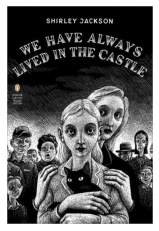

In [12]:
def plot_image(row):
    """
    input: row of the books dataset
    output: plotting corresponding image
    """
    assert isinstance(row, int)
    assert row >=0 and row < books.shape[0]
    url = books['image_url'].iloc[row]
    image = imageio.imread(url)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
plot_image(1000)

<div style="background-color:red;"><span style="color:navy;">Search for authors and books should be more robust and the whole author's names and the whole book's name shouldn't be required</span></div>

<div style="background-color:red;"><span style="color:navy;">Amazon's dataset do not match books. A better analysis should be done for matching these two.</span></div>

In [ ]:
def cleaned_len(index, dataframe):
    """
    input: index of the row which needs to be cleaned
    output: number of text words after and before cleaning 
    """
    assert isinstance(index, int)
    assert isinstance(dataframe, pd.core.frame.DataFrame)
    assert index>=0 and index<len(dataframe)
    return len(clean(dataframe.iloc[index]['book_desc'])), len(dataframe.iloc[index]['book_desc'].split())

In [284]:
def clean_books(length, index):
    all_cleaned = []
    for i in range(len(books)):
        text = books['book_desc'].iloc[i]
        all_cleaned.append(clean(text))
        ##showing progress
        #if i % int(len(books)/100)==0:
            #print ("{} percent".format(int(i / int(len(books)/100))))
    return all_cleaned
all_cleaned = clean_books(10,books)
flattened = [item for sublist in all_cleaned for item in sublist]

In [ ]:
#length of all the words
s = 0
for l in range(len(all_cleaned)):
    s+=len(all_cleaned[l])
unique_words = np.unique(flattened)
len(unique_words)/s*100

In [130]:
#applying stemming only reduces the size by 1 percent so we're gonna disregard that

In [147]:
diction = {}
for i in range(len(books)):
    text = books['book_desc'].iloc[i]
    for j in range(len(unique_words)):
        value = unique_words[j]
        count = text.count(value)
        if value in diction:
            diction[value]+=count
        else:
            diction[value] = count
    ##showing progress
    if i % int(len(books)/100)==0:
        print ("{} percent".format(int(i / int(len(books)/100))))

0 percent
1 percent
2 percent
3 percent
4 percent
5 percent
6 percent
7 percent
8 percent
9 percent
10 percent
11 percent
12 percent
13 percent
14 percent
15 percent
16 percent
17 percent
18 percent
19 percent
20 percent
21 percent
22 percent
23 percent
24 percent
25 percent
26 percent
27 percent
28 percent
29 percent
30 percent
31 percent
32 percent
33 percent
34 percent
35 percent
36 percent
37 percent
38 percent
39 percent
40 percent
41 percent
42 percent
43 percent
44 percent
45 percent
46 percent
47 percent
48 percent
49 percent
50 percent
51 percent
52 percent
53 percent
54 percent
55 percent
56 percent
57 percent
58 percent
59 percent
60 percent
61 percent
62 percent
63 percent
64 percent
65 percent
66 percent
67 percent
68 percent
69 percent
70 percent
71 percent
72 percent
73 percent
74 percent
75 percent
76 percent
77 percent
78 percent
79 percent
80 percent
81 percent
82 percent
83 percent
84 percent
85 percent
86 percent
87 percent
88 percent
89 percent
90 percent
91 percen

In [149]:
sum(diction.values())

44138174

In [153]:
len(diction)

236976

In [162]:
with open('word_freq.txt', 'a') as out:
    out.write(str(diction))

In [180]:
d = {}
for k, v in diction.items():
    if v >5000 and len(k) > 2:
        d[k] = v

In [ ]:
#description doesn't help us based on the dictionary

<div style="background-color:khaki;"><span style="color:navy;">Creating bag of words for all the title</span></div>

In [192]:
#text = books['book_title'].iloc[0]
#clean(text)

In [190]:
all_titles = []
titles_words_dic = {}
for i in range(len(books)):
    text = books['book_title'].iloc[i]
    words = clean(text)
    for w in words:
        all_titles.append(w)
        if w not in titles_words_dic:
            titles_words_dic[w] = 1
        else:
            titles_words_dic[w] +=1

In [195]:
len(all_titles), len(np.unique(all_titles))

(114656, 28056)

In [230]:
titles_dict = {}
for k,v in titles_words_dic.items():
    if v >10:
        if k not in titles_dict:
            titles_dict[k] = v
        else:
            titles_dict[k] += v

In [231]:
len(titles_dict)

1744

<div style="background-color:khaki;"><span style="color:navy;">Book suggestion based on books attributes (RF, etc)</span></div>

In [ ]:
def rec_auth_gen(title):
    """
    takes in the the title of a book
    finds authors and genres of a book and then recommends the most similar one using RF model    
    """
    recommended_books[]
    filtered = books[books['book_title']] #future: what if there is a same title for differnt books?
    authors = filtered['book_authors'].split("")
    genres = filtered['genres'].split("|")
    len()

<div style="background-color:khaki;"><span style="color:navy;">Book suggestion based on book description similarity</span></div>

<div style="background-color:khaki;"><span style="color:navy;">Book suggestion based on title similarity</span></div>

<div style="background-color:orange;"><span style="color:navy;">Review data</span></div>

In [37]:
import pandas as pd
import numpy as np
import string
import nltk
import re

In [5]:
#reviews = pd.read_csv("../data/amazon_final.csv", error_bad_lines=False)

In [43]:
#merging review data with the current dataset

In [3]:
reviews.shape

(5401, 1)

In [30]:
rev = str(reviews.iloc[0])
rev[:400]

'\\tbook_authors\\tbook_desc\\tbook_edition\\tbook_format\\tbook_isbn\\tbook_pages\\tbook_rating\\tbook_rating_count\\tbook_review_count\\tbook_title\\tgenres\\timage_url\\tAmzn_rcmd\\tbook_title_stripped\\tAmazon_Reviews     2012""}\']"\nName: (2\\tHarper Lee\\tThe unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it,  To Kill A Mockingbird became both an instant b'

In [41]:
punctuation = string.punctuation #'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
stopword_list = nltk.corpus.stopwords.words('english')
def isEnglish(text):
    """
    input: text
    output: boolean (checks whether the text is in English or not)
    """
    assert isinstance(text, str)
    try:
        text.encode(encoding="utf-8").decode("ascii")
    except UnicodeDecodeError:
        return False
    else:
        return True
    
def clean(text):
    """
    input: text
    output: text after basic cleaning (removing stopwords, punctuations and stem words and non-alphabets)
    """
    assert isinstance(text, str)
    cleaned = []
    #checking for stopwords
    for w in text.split():
        w = w.lower()
        alphabet = re.compile('[^a-zA-Z]')
        w = alphabet.sub('', w)
        w = w.translate(str.maketrans('', '', punctuation))
        if w not in stopword_list and isEnglish(w) and len(w)>1:
            if len(w) < 40:
                cleaned.append(w)
    ##Stemming
    #porter = PorterStemmer()
    #cleaned = [porter.stem(w) for w in cleaned]
    cleaned = np.unique(cleaned)
    return cleaned

In [155]:
def return_isbn(rev):
    s = [m.start() for m in re.finditer('asin', rev)]
    e = [m.end() for m in re.finditer('"",  ""reviewerName"":',  rev)]
    if len(s)>0 and len(e)>0:
        isbn = rev[s[0]+10:e[0]-23]
    else:
        isbn = "no isbn"
    #assert len(isbn)==9
    return isbn

In [369]:
len(reviews)

5401

In [495]:
all_cleaned_data = {}
check = {}
for i in range(len(reviews)):
    rev = str(reviews.iloc[i])
    cleaned = clean(rev)
    isbn = return_isbn(rev)
    all_cleaned_data[isbn] = cleaned
    check[isbn] = cleaned
    if i%1000==0:
        print (i/len(reviews)*100, "%")

0.0 %
18.51508979818552 %
37.03017959637104 %
55.54526939455656 %
74.06035919274208 %
92.57544899092761 %


In [496]:
#check is the final dictionary

In [ ]:
now taking the v s out of it and cleaning.

In [501]:
import spacy
nlp = spacy.load('en_core_web_sm') #you can use other methods
# excluded tags
excluded_tags = {"NOUN", "VERB", "ADV", "ADP", "PROPN"}

vocabularies = []
for k, v in check.items():
    s = ''
    for i in v:
        s += str(i) + " "
    words = []
    for token in nlp(s):
        if token.pos_ not in excluded_tags:
            if str(token) in list(d.keys()):
                if str(token) not in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']:
                    words.append(str(token))
    vocabularies.append(words)

In [505]:
#vocabularies[0]

In [508]:
not_ = ['unixreviewtime', 'let', 'true', 'another', 'little', 'big', 'large', 'although', 'sort', 'less', 'able', 'get','upon', 'many', 'must', 'everyone', 'take', 'several', 'overall', 'whose', 'either', 'gets', 'yes', 'top', 'able', 'started', 'need', 'something', 'whole', 'us', 'me', 'could', 'would','should', 'we', 'you', 'they', 'least', 'want','them', 'that', 'this', 'may', 'might']
col = ['']*len(vocabularies)
for j in range(len(vocabularies)):
    st = ''
    for x in vocabularies[j]:
        if x not in not_:
            st += "*" + x + "*  " 
    col[j] = st

In [512]:
data_isbn = pd.read_csv("../data_isbn.csv")

In [519]:
isbns_in_check = list(check.keys())

In [520]:
isbns_in_df = list(data_isbn['book_isbn'])
same = []
for i in range(len(isbns_in_check)):
    if isbns_in_check[i] in isbns_in_df:
        same.append(isbns_in_check[i])

In [521]:
len(same)

4416

In [576]:
filtered_review_based = data_isbn.loc[data_isbn['book_isbn'].isin(same)]

In [577]:
len(list(filtered_review_based['book_isbn'])), len(np.unique(list(filtered_review_based['book_isbn'])))

(4970, 4416)

In [578]:
col_isbns = {}
for i in range(len(col)):
    col_isbns[isbns_in_check[i]] = col[i]

In [579]:
filtered_review_based['review keywords'] = ['']*len(filtered_review_based)

<ipython-input-579-748a81f5d97c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_review_based['review keywords'] = ['']*len(filtered_review_based)


In [580]:
for i in range(len(filtered_review_based)):
    ISBN = filtered_review_based['book_isbn'].iloc[i]
    filtered_review_based['review keywords'].iloc[i] = col_isbns[ISBN]

/Users/fatemeh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-580-8d168122ce31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_review_based['review keywords'].iloc[i] = col_isbns[ISBN]


In [581]:
A = filtered_review_based.copy()

In [582]:
filtered_review_based = filtered_review_based[['book_title', 'book_authors', 'book_desc', 'book_pages', 'book_rating', 'genres', 'review keywords']]

In [583]:
filtered_review_based.columns = ['title', 'authors', 'description', 'number of pages', 'rating', 'genres', 'review keywords']

In [584]:
for i in range(len(filtered_review_based)):
    try: 
        pages = filtered_review_based.iloc[i]['number of pages']
        index = pages.index('pages')
        filtered_review_based.iloc[i]['number of pages'] = pages[:index]
    except:
        pass
        #print("no pages for index {}".format(i))

<ipython-input-584-9411fa5f534a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_review_based.iloc[i]['number of pages'] = pages[:index]


In [588]:
for i in range(len(filtered_review_based)):
    rate = A.iloc[i]['book_rating']
    reviews_number = A.iloc[i]['book_review_count']
    filtered_review_based['rating'].iloc[i] = str(rate) + " out of " + str(reviews_number) + " reviews"

In [592]:
for i in range(len(filtered_review_based)):
    try:
        gs = filtered_review_based.iloc[i]['genres']
        new_genres = gs.replace("|", " | ")
        filtered_review_based['genres'].iloc[i] = new_genres
    except:
        pass

In [599]:
filtered_review_based.to_csv("filtered_review_based.csv")

In [595]:
filtered_review_based.columns = ['title', 'authors', 'description', 'number of pages', 'average rating', 'genres', "reviews' keywords"]

In [605]:
A[:2]

,Unnamed: 0,Unnamed: 0.1,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Amzn_rcmd,book_title_stripped,Matched_ISBNS,review keywords
2,2,2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,0060194995,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,1,tokillamockingbird,NaN,*amazing* *american* *best* *black* *boy* ...
32,32,32,L.M. Montgomery,As soon as Anne Shirley arrives at the snug wh...,NaN,Paperback,0771093683,320 pages,4.24,599365,16797,Anne of Green Gables,Classics|Fiction|Young Adult|Childrens|Histori...,https://images.gr-assets.com/books/1390789015l...,0,anneofgreengables,NaN,*amazing* *bad* *better* *certain* *classi...


In [611]:
for i in range(len(filtered_review_based)):
    desc = A.iloc[i]['book_desc']
    amzn = A.iloc[i]['Amzn_rcmd']
    if amzn ==1:
        filtered_review_based['description'].iloc[i] = " *Amazon best selling book 2009-2019*    " + desc

In [612]:
filtered_review_based

,title,authors,description,number of pages,average rating,genres,reviews' keywords,more about author(s)
2,To Kill a Mockingbird,Harper Lee,*Amazon best selling book 2009-2019* The u...,324 pages,4.27 out of 79450 reviews,Classics | Fiction | Historical | Histor...,*amazing* *american* *best* *black* *boy* ...,
32,Anne of Green Gables,L.M. Montgomery,As soon as Anne Shirley arrives at the snug wh...,320 pages,4.24 out of 16797 reviews,Classics | Fiction | Young Adult | Child...,*amazing* *bad* *better* *certain* *classi...,
117,Tuesdays with Morrie,Mitch Albom|Saulius Dagys,"Maybe it was a grandparent, or a teacher or a ...",210 pages,4.08 out of 21367 reviews,Nonfiction | Autobiography | Memoir | Bi...,*enjoy* *everything* *final* *good* *great...,
141,The Divine Comedy,Dante Alighieri|Allen Mandelbaum|Eugenio Montale,The Divine Comedy describes Dante's descent in...,798 pages,4.07 out of 3127 reviews,Classics | Poetry | Fiction | Literature,*anything* *better* *close* *different* *d...,
142,The Compleat Works of Wllm Shkspr (abridged),Reduced Shakespeare Company|Jess Borgeson|Adam...,Revised from the rather long original complete...,137 pages,4.47 out of 127 reviews,Plays | Classics | Humor | Fiction | D...,*better* *complete* *funny* *good* *great*...,
...,...,...,...,...,...,...,...,...
54191,Still Waters,Emma Carlson Berne,Hannah can't wait to sneak off for a romantic ...,212 pages,3.17 out of 146 reviews,Young Adult | Mystery | Horror | Thriller | Ro...,*bad* *complete* *dark* *enough* *everythi...,
54239,Angels Everywhere,Debbie Macomber,A Heavensent Gift of Love In a season of givin...,640 pages,4.25 out of 62 reviews,Romance | Holiday | Christmas | Fiction,*first* *funny* *good* *great* *happy* *h...,
54240,The Royal Family,William T. Vollmann,A magnificent new novel from a writer whose bo...,774 pages,3.89 out of 82 reviews,Fiction | Novels | Contemporary | Mystery | Crime,*american* *anything* *better* *early* *en...,
54256,My Pony,Susan Jeffers,I want a pony. I want a pony more than anythin...,32 pages,4.08 out of 38 reviews,Childrens | Picture Books | Animals | Horses |...,*anything* *beautiful* *become* *favorite* ...,


In [597]:
filtered_review_based['more about author(s)'] = ['']*len(filtered_review_based)

In [619]:
!ls ..\

README.md             authors_df.csv        notebooks
amazon_final copy.csv data
amazon_final.csv      data_isbn.csv


In [627]:
authors_df = pd.read_csv("../authors_df.csv")

In [629]:
import math

In [651]:
i = 0
website = authors_df['website'].iloc[i]
twitter = authors_df['twitter'].iloc[i]
country = authors_df['country'].iloc[i]
gender = authors_df['gender'].iloc[i]
works = authors_df['workcount'].iloc[i]
average_rating = authors_df['average_rate'].iloc[i]
info = ''
if  str(website) != 'nan':
    info += "website: " + website + " | "
if str(twitter) != 'nan':
    info += "twitter ID: " + twitter+ " | "
if str(gender) != 'nan':
    info += "gender: " + gender+ " | "
if str(country) != 'nan':
    info += "Country: " + country   + " | "
if str(works)  != 'nan' and str(average_rating) != 'nan':
    info += "average ratings of {} works: {}".format(works, average_rating)   
#authors_df.head()
info

'gender: male | Country: United Kingdom | average ratings of 2 works: 3.74'

In [677]:
def return_info(i):
    website = authors_df['website'].iloc[i]
    twitter = authors_df['twitter'].iloc[i]
    country = authors_df['country'].iloc[i]
    gender = authors_df['gender'].iloc[i]
    works = authors_df['workcount'].iloc[i]
    average_rating = authors_df['average_rate'].iloc[i]
    info = ''
    if  str(website) != 'nan':
        info += "website: " + website + " | "
    if str(twitter) != 'nan':
        info += "twitter ID: " + twitter+ " | "
    if str(gender) != 'nan' and str(gender) != 'unknown' :
        info += "gender: " + gender+ " | "
    if str(country) != 'nan':
        info += "Country: " + country   + " | "
    if str(works)  != 'nan' and str(average_rating) != 'nan':
        info += "average ratings of {} works: {}".format(works, average_rating)   
    #authors_df.head()
    return info

In [680]:
filtered_review_based['more about author(s)']

2        *Harper Lee*: gender: male | Country: United K...
32       *L.M. Montgomery*: average ratings of 4 works:...
117      *Mitch Albom*: website: http://www.nannafoss.d...
141      *Dante Alighieri*: website: http://www.terri.c...
142      *Reduced Shakespeare Company*: average ratings...
                               ...                        
54191    *Emma Carlson Berne*: gender: male | average r...
54239    *Debbie Macomber*: average ratings of 6 works:...
54240    *William T. Vollmann*: website: https://philli...
54256    *Susan Jeffers*: gender: male | Country: Unite...
54262    *Richard Yates*: website: http://rachelwalkley...
Name: more about author(s), Length: 4970, dtype: object

In [681]:
for i in range(len(filtered_review_based)):
    authors = str(filtered_review_based['authors'].iloc[i]).split("|")
    info = ''
    for aut in authors:
        info += "*" + aut + "*: " + return_info(i) + "      "
    filtered_review_based['more about author(s)'].iloc[i] = info

In [685]:
filtered_review_based.to_csv("books_authors_final_.csv")

In [686]:
pd.read_csv("books_authors_final_.csv")
#filtered_review_based

,Unnamed: 0,title,authors,description,number of pages,average rating,genres,reviews' keywords,more about author(s),image_url
0,2,To Kill a Mockingbird,Harper Lee,*Amazon best selling book 2009-2019* The u...,324 pages,4.27 out of 79450 reviews,Classics | Fiction | Historical | Histor...,*amazing* *american* *best* *black* *boy* ...,*Harper Lee*: gender: male | Country: United K...,https://images.gr-assets.com/books/1361975680l...
1,32,Anne of Green Gables,L.M. Montgomery,As soon as Anne Shirley arrives at the snug wh...,320 pages,4.24 out of 16797 reviews,Classics | Fiction | Young Adult | Child...,*amazing* *bad* *better* *certain* *classi...,*L.M. Montgomery*: average ratings of 4 works:...,https://images.gr-assets.com/books/1390789015l...
2,117,Tuesdays with Morrie,Mitch Albom|Saulius Dagys,"Maybe it was a grandparent, or a teacher or a ...",210 pages,4.08 out of 21367 reviews,Nonfiction | Autobiography | Memoir | Bi...,*enjoy* *everything* *final* *good* *great...,*Mitch Albom*: website: http://www.nannafoss.d...,https://images.gr-assets.com/books/1423763749l...
3,141,The Divine Comedy,Dante Alighieri|Allen Mandelbaum|Eugenio Montale,The Divine Comedy describes Dante's descent in...,798 pages,4.07 out of 3127 reviews,Classics | Poetry | Fiction | Literature,*anything* *better* *close* *different* *d...,*Dante Alighieri*: website: http://www.terri.c...,https://images.gr-assets.com/books/1390760180l...
4,142,The Compleat Works of Wllm Shkspr (abridged),Reduced Shakespeare Company|Jess Borgeson|Adam...,Revised from the rather long original complete...,137 pages,4.47 out of 127 reviews,Plays | Classics | Humor | Fiction | D...,*better* *complete* *funny* *good* *great*...,*Reduced Shakespeare Company*: average ratings...,https://images.gr-assets.com/books/1347579233l...
...,...,...,...,...,...,...,...,...,...,...
4965,54191,Still Waters,Emma Carlson Berne,Hannah can't wait to sneak off for a romantic ...,212 pages,3.17 out of 146 reviews,Young Adult | Mystery | Horror | Thriller | Ro...,*bad* *complete* *dark* *enough* *everythi...,*Emma Carlson Berne*: gender: male | average r...,https://images.gr-assets.com/books/1327985610l...
4966,54239,Angels Everywhere,Debbie Macomber,A Heavensent Gift of Love In a season of givin...,640 pages,4.25 out of 62 reviews,Romance | Holiday | Christmas | Fiction,*first* *funny* *good* *great* *happy* *h...,*Debbie Macomber*: average ratings of 6 works:...,https://images.gr-assets.com/books/1348822196l...
4967,54240,The Royal Family,William T. Vollmann,A magnificent new novel from a writer whose bo...,774 pages,3.89 out of 82 reviews,Fiction | Novels | Contemporary | Mystery | Crime,*american* *anything* *better* *early* *en...,*William T. Vollmann*: website: https://philli...,https://images.gr-assets.com/books/1386921561l...
4968,54256,My Pony,Susan Jeffers,I want a pony. I want a pony more than anythin...,32 pages,4.08 out of 38 reviews,Childrens | Picture Books | Animals | Horses |...,*anything* *beautiful* *become* *favorite* ...,*Susan Jeffers*: gender: male | Country: Unite...,https://images.gr-assets.com/books/1387668516l...


In [666]:
filtered_review_based['image_url'] = A['image_url']

In [667]:
filtered_review_based

,title,authors,description,number of pages,average rating,genres,reviews' keywords,more about author(s),image_url
2,To Kill a Mockingbird,Harper Lee,*Amazon best selling book 2009-2019* The u...,324 pages,4.27 out of 79450 reviews,Classics | Fiction | Historical | Histor...,*amazing* *american* *best* *black* *boy* ...,*Harper Lee*: gender: male | Country: United K...,https://images.gr-assets.com/books/1361975680l...
32,Anne of Green Gables,L.M. Montgomery,As soon as Anne Shirley arrives at the snug wh...,320 pages,4.24 out of 16797 reviews,Classics | Fiction | Young Adult | Child...,*amazing* *bad* *better* *certain* *classi...,*L.M. Montgomery*: gender: unknown | average r...,https://images.gr-assets.com/books/1390789015l...
117,Tuesdays with Morrie,Mitch Albom|Saulius Dagys,"Maybe it was a grandparent, or a teacher or a ...",210 pages,4.08 out of 21367 reviews,Nonfiction | Autobiography | Memoir | Bi...,*enjoy* *everything* *final* *good* *great...,*Mitch Albom*: website: http://www.nannafoss.d...,https://images.gr-assets.com/books/1423763749l...
141,The Divine Comedy,Dante Alighieri|Allen Mandelbaum|Eugenio Montale,The Divine Comedy describes Dante's descent in...,798 pages,4.07 out of 3127 reviews,Classics | Poetry | Fiction | Literature,*anything* *better* *close* *different* *d...,*Dante Alighieri*: website: http://www.terri.c...,https://images.gr-assets.com/books/1390760180l...
142,The Compleat Works of Wllm Shkspr (abridged),Reduced Shakespeare Company|Jess Borgeson|Adam...,Revised from the rather long original complete...,137 pages,4.47 out of 127 reviews,Plays | Classics | Humor | Fiction | D...,*better* *complete* *funny* *good* *great*...,*Reduced Shakespeare Company*: gender: unknown...,https://images.gr-assets.com/books/1347579233l...
...,...,...,...,...,...,...,...,...,...
54191,Still Waters,Emma Carlson Berne,Hannah can't wait to sneak off for a romantic ...,212 pages,3.17 out of 146 reviews,Young Adult | Mystery | Horror | Thriller | Ro...,*bad* *complete* *dark* *enough* *everythi...,*Emma Carlson Berne*: gender: male | average r...,https://images.gr-assets.com/books/1327985610l...
54239,Angels Everywhere,Debbie Macomber,A Heavensent Gift of Love In a season of givin...,640 pages,4.25 out of 62 reviews,Romance | Holiday | Christmas | Fiction,*first* *funny* *good* *great* *happy* *h...,*Debbie Macomber*: gender: unknown | average r...,https://images.gr-assets.com/books/1348822196l...
54240,The Royal Family,William T. Vollmann,A magnificent new novel from a writer whose bo...,774 pages,3.89 out of 82 reviews,Fiction | Novels | Contemporary | Mystery | Crime,*american* *anything* *better* *early* *en...,*William T. Vollmann*: website: https://philli...,https://images.gr-assets.com/books/1386921561l...
54256,My Pony,Susan Jeffers,I want a pony. I want a pony more than anythin...,32 pages,4.08 out of 38 reviews,Childrens | Picture Books | Animals | Horses |...,*anything* *beautiful* *become* *favorite* ...,*Susan Jeffers*: gender: male | Country: Unite...,https://images.gr-assets.com/books/1387668516l...


In [ ]:
all_cleaned_data = {}
check = ['']*len(reviews)
for i in range(len(reviews)):
    rev = str(reviews.iloc[i])
    cleaned = clean(rev)
    isbn = return_isbn(rev)
    all_cleaned_data[isbn] = cleaned
    check[i] = cleaned
    if i%1000==0:
        print (i/len(reviews)*100, "%")

In [ ]:
isbns = []
for i in range(len(reviews)):
    rev = str(reviews.iloc[i])
    cleaned = clean(rev)
    isbn = return_isbn(rev)
    isbns.append(isbn)
    if i%1000==0:
        print (i/len(reviews)*100, "%")

In [ ]:
#choosing all the frequent words out of the reviews

In [192]:
all_words = []
for k, v in all_cleaned_data.items():
    for i in v:
        all_words.append(i)

In [193]:
len(all_words), len(np.unique(all_words))

(1717888, 171422)

In [194]:
diction = {}
for w in all_words:
    if w not in diction:
        diction[w] = 1
    else:
        diction[w] +=1

In [195]:
d = {}
for k, v in diction.items():
    if v >500:
        d[k] = v

In [196]:
len(d)

546

In [202]:
#del d['id']
#del d['asin']
#del d['dr']
#del d['also']
#del d['dtype']
#del d['due']
del d['ever']
del d['every']
del d['entire']
del d['might']
del d['nan']
del d['cant']

In [204]:
del d['etc']
del d['title']
del d['couldnt']
del d['provides']
del d['th']
del d['ago']
del d['came']
del d['shes']

In [228]:
del d['anyone']
del d['would']

In [150]:
kw = {}
for k, v in all_cleaned_data.items():
    l = []
    for w in list(d.keys()):
        if w in v:
            l.append(w)
    kw[k] = l

In [148]:
len(kw['006019499']), len(all_cleaned_data['006019499'])

(208, 373)

In [160]:
#!pip install spacy

In [163]:
#!python -m spacy download en

In [164]:
spacy.load('en_core_web_sm')

In [229]:
import spacy
nlp = spacy.load('en_core_web_sm') #you can use other methods
# excluded tags
excluded_tags = {"NOUN", "VERB", "ADV", "ADP", "PROPN"}

vocabularies = []
for k, v in check.items():
    s = ''
    for i in v:
        s += str(i) + " "
    words = []
    for token in nlp(s):
        if token.pos_ not in excluded_tags:
            if str(token) in list(d.keys()):
                if str(token) not in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']:
                    words.append(str(token))
    vocabularies.append(words)

In [473]:
vocabularies = []
for k, v in all_cleaned_data.items():
    s = ''
    for i in v:
        s += str(i) + " "
    words = []
    for token in nlp(s):
        if token.pos_ not in excluded_tags:
            if str(token) in list(d.keys()):
                if str(token) not in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']:
                    words.append(str(token))
    vocabularies.append(words)

In [477]:
#vocabularies

In [446]:
not_ = ['unixreviewtime', 'let', 'true', 'another', 'little', 'big', 'large', 'although', 'sort', 'less', 'able', 'get','upon', 'many', 'must', 'everyone', 'take', 'several', 'overall', 'whose', 'either', 'gets', 'yes', 'top', 'able', 'started', 'need', 'something', 'whole', 'us', 'me', 'could', 'would','should', 'we', 'you', 'they', 'least', 'want','them', 'that', 'this', 'may', 'might']

In [468]:
not_ = ['unixreviewtime', 'let', 'true', 'another', 'little', 'big', 'large', 'although', 'sort', 'less', 'able', 'get','upon', 'many', 'must', 'everyone', 'take', 'several', 'overall', 'whose', 'either', 'gets', 'yes', 'top', 'able', 'started', 'need', 'something', 'whole', 'us', 'me', 'could', 'would','should', 'we', 'you', 'they', 'least', 'want','them', 'that', 'this', 'may', 'might']
col = ['']*len(w__)
for j in range(len(w__)):
    st = ''
    for x in w__[j]:
        if x not in not_:
            st += "*" + x + "*  " 
    col[j] = st

In [470]:
len(w__)

4539

In [358]:
def return_isbn(rev):
    s = [m.start() for m in re.finditer('asin', rev)]
    #e = [m.end() for m in re.finditer('"",  ""reviewerName"":',  rev)]
    if len(s)>0:
        isbn = rev[s[0]+10:s[0]+20]
    else:
        isbn = "no isbn"
    #assert len(isbn)==9
    return isbn

In [388]:
isbns = []
for i in range(len(reviews)):
    rev = str(reviews.iloc[i])
    cleaned = clean(rev)
    isbn = return_isbn(rev)
    isbns.append(isbn)
    if i%1000==0:
        print (i/len(reviews)*100, "%")

0.0 %
18.51508979818552 %
37.03017959637104 %
55.54526939455656 %
74.06035919274208 %
92.57544899092761 %


In [492]:
#isbns

In [626]:
data_isbn = pd.read_csv("../data_isbn.csv")

In [394]:
isbns_ = list(data_isbn['book_isbn'])

In [411]:
same = []
for i in range(len(isbns_)):
    if isbns_[i] in isbns:
        same.append(isbns_[i])

In [412]:
len(isbns), len(isbns_), len(same)

(5401, 54301, 4970)

In [416]:
data_isbn = pd.read_csv("../data_isbn.csv")

isbns_ = list(data_isbn['book_isbn'])


same = []
for i in range(len(isbns_)):
    if isbns_[i] in isbns:
        same.append(isbns_[i])
        
        
filtered_review_based = data_isbn.loc[data_isbn['book_isbn'].isin(same)]

In [420]:
filtered_review_based = data_isbn.loc[data_isbn['book_isbn'].isin(isbns)]

In [424]:
filtered_review_based['review keywords'] = np.zeros(filtered_review_based.shape[0])

<ipython-input-424-5ec1fecf9dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_review_based['review keywords'] = np.zeros(filtered_review_based.shape[0])


In [853]:
filtered_review_based.head()

,title,authors,description,number of pages,average rating,genres,reviews' keywords,more about author(s),image_url
2,To Kill a Mockingbird,Harper Lee,*Amazon best selling book 2009-2019* The u...,324 pages,4.27 out of 79450 reviews,Classics | Fiction | Historical | Histor...,*amazing* *american* *best* *black* *boy* ...,*Harper Lee*: gender: male | Country: United K...,https://images.gr-assets.com/books/1361975680l...
32,Anne of Green Gables,L.M. Montgomery,As soon as Anne Shirley arrives at the snug wh...,320 pages,4.24 out of 16797 reviews,Classics | Fiction | Young Adult | Child...,*amazing* *bad* *better* *certain* *classi...,*L.M. Montgomery*: average ratings of 4 works:...,https://images.gr-assets.com/books/1390789015l...
117,Tuesdays with Morrie,Mitch Albom|Saulius Dagys,"Maybe it was a grandparent, or a teacher or a ...",210 pages,4.08 out of 21367 reviews,Nonfiction | Autobiography | Memoir | Bi...,*enjoy* *everything* *final* *good* *great...,*Mitch Albom*: website: http://www.nannafoss.d...,https://images.gr-assets.com/books/1423763749l...
141,The Divine Comedy,Dante Alighieri|Allen Mandelbaum|Eugenio Montale,The Divine Comedy describes Dante's descent in...,798 pages,4.07 out of 3127 reviews,Classics | Poetry | Fiction | Literature,*anything* *better* *close* *different* *d...,*Dante Alighieri*: website: http://www.terri.c...,https://images.gr-assets.com/books/1390760180l...
142,The Compleat Works of Wllm Shkspr (abridged),Reduced Shakespeare Company|Jess Borgeson|Adam...,Revised from the rather long original complete...,137 pages,4.47 out of 127 reviews,Plays | Classics | Humor | Fiction | D...,*better* *complete* *funny* *good* *great*...,*Reduced Shakespeare Company*: average ratings...,https://images.gr-assets.com/books/1347579233l...


In [433]:
len(all_cleaned_data)

4539

In [ ]:
isbn_keywords = {}
for i in range(len(isbns))
    isbn_keywords[isbns[i]] = cols[i]

In [438]:
len(isbns), len(col)

(5401, 4539)

In [689]:
import pandas as pd
df = pd.read_csv('../books_authors_final.txt', delimiter = ",")

In [856]:
x = filtered_review_based.copy()
x.reset_index(drop=True)
x.to_csv("books_engine.csv")

<div style="background-color:orange;"><span style="color:navy;">Book Engine</span><br><br><br></div>

In [2]:
import pandas as pd
import numpy as np
import math
import nltk
from nltk.corpus import stopwords
import re
import string
from collections import Counter
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df = pd.read_csv("books_engine.csv")

In [5]:
book_titles_dict = df['title'].to_dict()
opt = []
for k,v in book_titles_dict.items():
    temp_d = {}
    temp_d["label"] = v
    temp_d["value"] = v
    opt.append(temp_d)

In [19]:
def book_engine(book):
    titles = list(df['title'])
    response = requests.get(df.iloc[0]['image_url'])
    img = Image.open(BytesIO(response.content))
    index = titles.index(book)
    return [df.iloc[index]['title'], df.iloc[index]['authors'], 
            df.iloc[index]['average rating'], df.iloc[index]['genres'], df.iloc[index]['number of pages'], df.iloc[index]["reviews' keywords"], df.iloc[index]['description'], 
           df.iloc[index]['more about author(s)'], df.iloc[index]['image_url']]

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([html.H1('Book Search Engine',
            style={"background-color": "Lavender","margin-left":"auto","margin-right":"auto", 'display': 'flex', 'justify-content': 'center'}), html.Br(), 
    dcc.Dropdown(
        id='demo-dropdown',
        options= opt,
        value='To Kill a Mockingbird',
        style={"width":"1300px"}
    ), html.Br(),
    html.Div(html.Center(id='url')),
    html.Div(
        html.Table([
        html.Tr([html.Th(html.H6(' Title:',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue; "}), html.Td(id='title')], style={"border": "2px solid gray", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' Author(s):',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='author')], style={"border": "2px solid grey", "font-size":"14px"}),   
        html.Tr([html.Th(html.H6(' Average rating:',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='average_rating')], style={"border": "2px solid grey", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' Genres:',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='genres')], style={"border": "2px solid grey", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' Number of Pages:',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='pages')], style={"border": "2px solid grey", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' Keywords from review(s):',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='keywords')], style={"border": "2px solid grey", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' Description:',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='desc')], style={"border": "2px solid grey", "font-size":"14px"}),
        html.Tr([html.Th(html.H6(' More information about the Author(s):',style={"color": "black", "font-size":"16px", "margin-left": "10px"}),style={"background-color": "AliceBlue"}), html.Td(id='info')], style={"border": "2px solid grey", "font-size":"14px"}),
        ], style={"border-spacing": "10px","border": "2px solid grey",
              "margin-left":"400px","margin-right":"auto","background-color": "AliceBlue", "opacity": "0.9", "width":"900px"})),])

In [41]:
@app.callback(
    Output('title', 'children'),
    Output('author', 'children'),
    Output('average_rating', 'children'),
    Output('genres', 'children'),
    Output('pages', 'children'),
    Output('keywords', 'children'),
    Output('desc', 'children'),
    Output('info', 'children'),
    Output('url', 'children'),
    [dash.dependencies.Input('demo-dropdown', 'value')])
def update_output(value):
    x = book_engine(value)
    img = html.Img(src= x[8], style={"float":"left","width": "300px", "height": "400px" })
    return x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], img

if __name__ =='__main__':
    app.run_server(port=4000)

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

Dash is running on http://127.0.0.1:4000/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4000/ (Press CTRL+C to quit)


In [33]:
#recommend_desc(value)